

# Project: Investigate a Dataset (TMDb Movie Data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
in this project i choosed to investigate a movie Dataset that contain 10,000 movies and contain an information about movies such like cast , director , budget , release year and overview
  


## Questions:

Q1: what is the year that has the highest vote count in the Dataset ?<br>
Q2: what is the runtime for the most of the movies in the Dataset ?<br>
Q3: what is the relationship between runtime and the release year in the Dataset ?<br>
Q4: what is the year that the movies has the highest popularity and what is the relationship between popularity and the release year in the Dataset?<br>
Q5: what is the year that the movies has the highest profits and what is the relationship between the profit and the release year in the Dataset?<br>
Q6: what is the year that the movies has the highest budget and what is the relationship between the budget and the release year in the Dataset?<br>
Q7: Determine which the month has the highest revenue in the Dataset?<br>
Q8: Determine which the Director has the highest number of movies in the Dataset?<br>
Q9: Determine which the genres has the highest number of movies in the Dataset?<br>



In [182]:
# import statements for all of the packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After observations the data, exploring the questions  and importing the packages, In this section i will load the data, print number of columns & rows and describe the datatype of columns.

### General Properties

In [183]:
# Load the data and store it in df variable.
df= pd.read_csv("tmdb-movies.csv")
# return the top 5 rows to quick review 
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [184]:
print(df.shape) #print number of columns & rows 

(10866, 21)


In [185]:
df.info() # display the information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning

in this section i will clean the data. First, check if there is a duplicate and drop it and check again to make sure. Second, check if there is a null value and drop it and check again to make sure. 


check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

In [186]:
# delete un used columns 
un_used=[ 'id', 'imdb_id','cast', 'homepage','tagline','overview','keywords','production_companies','budget_adj','revenue_adj']
df= df.drop(un_used,1)

In [187]:
#to make sure 
df.head(2)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [188]:
df.dtypes # describe the datatype of columns

popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [189]:
#changing the date to standard format   
df.release_date = pd.to_datetime(df['release_date'])

In [190]:
#to make sure 
df.head(2)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


In [191]:
sum(df.duplicated()) # check if there is a duplicate 

1

In [192]:
df.drop_duplicates(inplace=True) # drop the duplicates 

In [193]:
sum(df.duplicated()) #check again 

0

In [194]:
profit_list=['budget', 'revenue','runtime']

#Replacing all the 0 value's to NAN in the budget, revenue and runtime column
df[profit_list] = df[profit_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = profit_list, inplace = True)

rows, col = df.shape

In [195]:
df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [196]:
# changing the data type from float to int 
profit_list= ['budget', 'revenue']
df[profit_list] = df[profit_list].applymap(np.int64)

In [197]:
#to make sure 
df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [198]:
df.isnull().sum() # check if there is null values and count them 

popularity        0
budget            0
revenue           0
original_title    0
director          1
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [199]:
df.dropna(inplace=True) # drop the null value 

In [200]:
df.isnull().sum()  #check again 

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [201]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [202]:
# replace underscores with spaces in the column name 
df.rename(columns=lambda x: x.strip().replace("_", " "), inplace=True)

In [203]:
# to make sure 
df.head(1)

,popularity,budget,revenue,original title,director,runtime,genres,release date,vote count,vote average,release year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis



In [204]:
#Calculate profit for each movie 
#by using insert function, insert profit column by subtract the revenue from the budget 
df.insert(3,'profit',df['revenue']-df['budget'])

In [205]:
#to make sure
df.head(1)

,popularity,budget,revenue,profit,original title,director,runtime,genres,release date,vote count,vote average,release year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015



## Q1: what is the year that has the highest vote count  in the Dataset ?


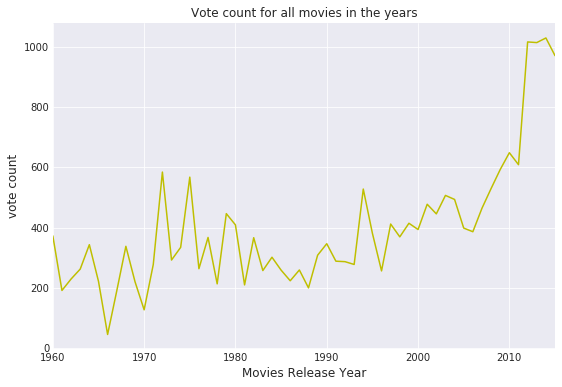

In [206]:
sns.set_style('darkgrid')
df.groupby('release year')['vote count'].mean().plot(kind='line',color="y", figsize = (9,6))
plt.title('Vote count for all movies in the years', fontsize = 12)
plt.xlabel('Movies Release Year', fontsize = 12)
plt.ylabel('vote count',fontsize = 12);


<font color='red'>**From the line plot above we see that 2010 has the highest vote count** </font> 


## Q2: what is the runtime for the most of the movies in the Dataset ?


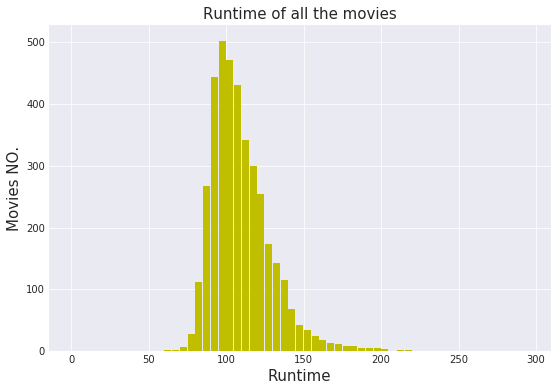

In [207]:
#Histogram for movies runtime 
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
#x-axis name 
plt.xlabel('Runtime', fontsize = 15)
#y-axis name
plt.ylabel('Movies NO.', fontsize=15)
#title 
plt.title('Runtime of all the movies', fontsize=15)
# range of bins by using numpy 
bins = np.arange(0,300,5)
plt.hist(df['runtime'], bins,histtype='bar',color="y", rwidth = 0.9 )
plt.show()
 

<font color='red'>**From the Histogram above we see that the most of movies time is between 90 to 115 minute** </font> 


## Q3: what is the relationship between runtime and the release year in the Dataset ?


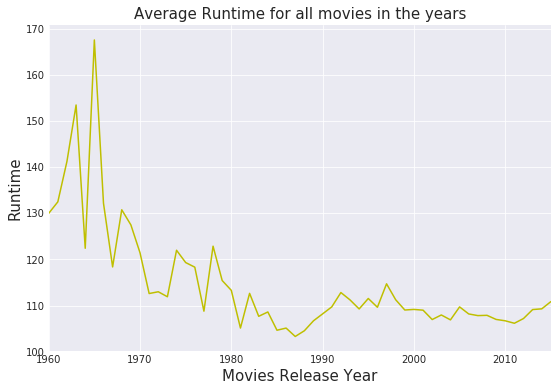

In [208]:
df.groupby('release year')['runtime'].mean().plot(kind='line', color="y",figsize = (9, 6))
plt.title('Average Runtime for all movies in the years', fontsize = 15)
plt.xlabel('Movies Release Year', fontsize = 15)
plt.ylabel('Runtime', fontsize = 15);

<font color='red'>**From the line plot above we see that the movies runtime has decreased year by year it has Negative relationship**</font> 

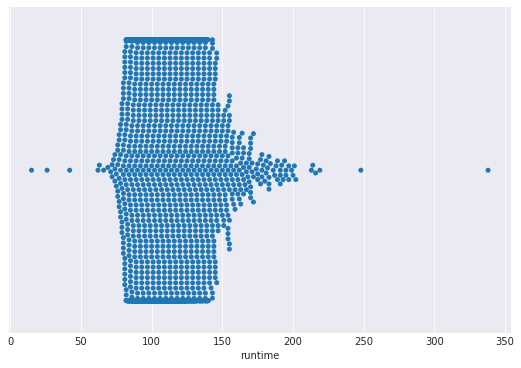

In [209]:
#plot scatterplots for movies runtime to view correlation visually
plt.figure(figsize=(9,6))
sns.swarmplot(df['runtime'])
plt.show()

In [210]:
df['runtime'].describe()

count    3853.000000
mean      109.208928
std        19.912913
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

<font color='red'>As we see in the previous visualization the calculation gives almost the same values <br>

25% having less than **95** min of runtime<br> 
50% having less than **109** min of runtime <br>
75% having less than **119** min of runtime </font>



## Q4: what is the year that the movies has the highest popularity and what is the relationship between popularity and the release year in the Dataset? 


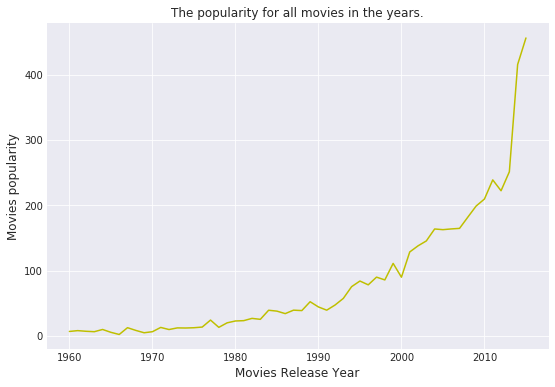

In [211]:
popularity_by_year = df.groupby('release year')['popularity'].sum()
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')

#x-axis name
plt.xlabel('Movies Release Year', fontsize = 12)
#y-axis name
plt.ylabel('Movies popularity', fontsize = 12)
#title 
plt.title('The popularity for all movies in the years.')

plt.plot(popularity_by_year,color="y")
plt.show()

<font color='red'>**From the line plot above we see that the movies popularity increasing year by year , Positive relationship and the 2010 has the highest popularity in the Dataset**</font> 


## Q5: what is the year that the movies has the highest profits and what is the relationship between the profit and the release year in the Dataset? 



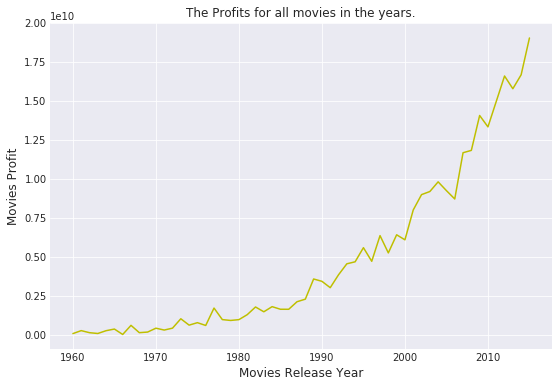

In [212]:
profits_by_year = df.groupby('release year')['profit'].sum()
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')

#x-axis name
plt.xlabel('Movies Release Year', fontsize = 12)
#y-axis name
plt.ylabel('Movies Profit', fontsize = 12)
#title 
plt.title('The Profits for all movies in the years.')

plt.plot(profits_by_year,color="y")
plt.show()

<font color='red'>**From the line plot above we see that the movies profits increasing year by year and the 2010 has the highest profit in the Dataset**</font> 


## Q6: what is the year that the movies has the highest budget and what is the relationship between the budget and the release year in the Dataset?


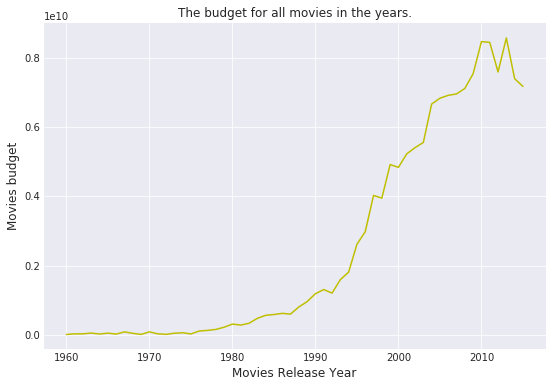

In [213]:
budget_by_year = df.groupby('release year')['budget'].sum()
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')

#x-axis name
plt.xlabel('Movies Release Year', fontsize = 12)
#y-axis name
plt.ylabel('Movies budget', fontsize = 12)
#title 
plt.title('The budget for all movies in the years.')

#plotting what needs to be plotted
plt.plot(budget_by_year,color="y")

plt.show()

<font color='red'>**From the line plot above we see that the movies budget increasing year by year and the 2010 almost has the highest budget in the Dataset**</font> 

### Q7:  Determine which the month has the highest revenue  in the Dataset? 


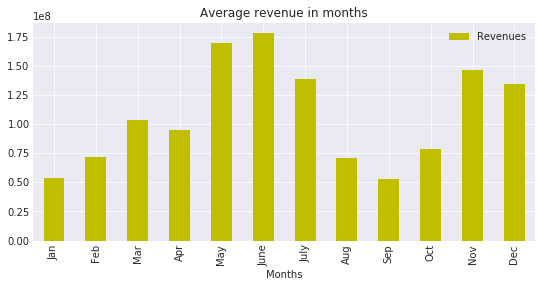

In [214]:

df['release month']=df['release date'].dt.month
month_revenue = df.groupby('release month')['revenue'].mean()
df1=pd.DataFrame()
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df1['Months']=months
df1['Revenues'] = list(month_revenue.get_values())

df1.plot(x='Months',y='Revenues',kind='bar',color="y",figsize=(9,4));
plt.title('Average revenue in months');


 
<font color='red'>**After display the plot i figure that May and june has the highest revenue and then November and December , thats mean They make a revenues more in the middle and last of the year, especially in the middle of the year**</font> 

### Q8:  Determine which the Director has the highest number of movies in the Dataset? 

In [215]:
# function to separate the data 
def separate_data(column_name):
    #separate the data between '|' in each column 
    all_data = df[column_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))    
    c = all_data.value_counts(ascending = False)
    return c

In [216]:
# function call 
director_c = separate_data('director')  
first_ten=director_c.head(10) 

there are huge number of director thats why i choose just first 10 director in ascending order and visualize it 

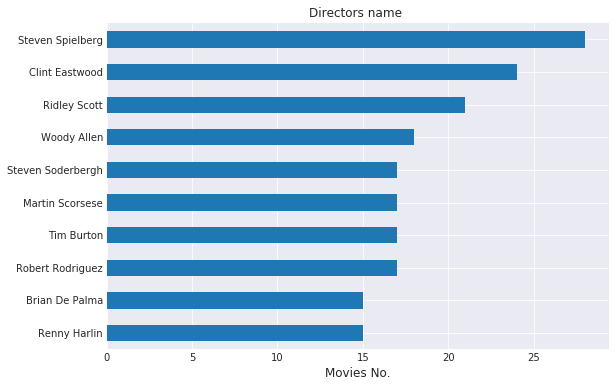

In [217]:
first_ten.sort_values(ascending = True, inplace = True)
x = first_ten.plot.barh()
#title
x.set(title = 'Directors name ')
#x-label
x.set_xlabel('Movies No.',fontsize = '12')
#figure size
x.figure.set_size_inches(9,6)
plt.show()

 <font color='red'>**After display the figure i recognize that Steven Spielberg produce more than 25 movie and then Clint Eastwood produce more than 20 movie**</font> 

In [218]:
#to make sure
director_c.head(10)

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Robert Rodriguez     17
Tim Burton           17
Martin Scorsese      17
Steven Soderbergh    17
Renny Harlin         15
Brian De Palma       15
dtype: int64

 <font color='red'>**And this proves what i finds in the previous figure**</font> 

### Q9:  Determine which the genres has the highest number of movies in the Dataset? 

In [219]:
# function call 
genres_c = separate_data('genres')
gen=genres_c.head(20)

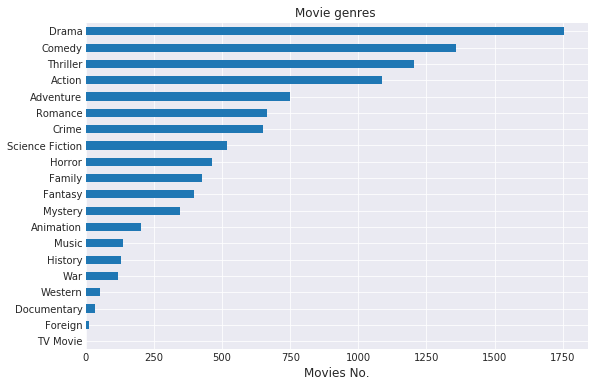

In [220]:
gen.sort_values(ascending = True, inplace = True)

x =gen.plot.barh()
#title
x.set(title = 'Movie genres ')
#x-label
x.set_xlabel('Movies No.',fontsize = '12')
#figure size
x.figure.set_size_inches(9,6)
plt.show()


<font color='red'>**After display the figure i recognize that Drama movies has the highest number of movies and the TV Movie has the lowest number**</font> 

In [221]:
#to make sure
genres_c.head(20)

Drama              1755
Comedy             1357
Thriller           1204
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              12
TV Movie              1
dtype: int64

 <font color='red'>**And this proves what i finds in the previous figure**</font> 

<a id='conclusions'></a>
## Conclusions

<font color='red'>it has been a very interesting project, through this data analysis process i have answered the question that i posted forst thing in this project and i come with more than one findings <br>

First of thing there is 21 columns and 10866 row, after observations the data i relize that there is un used columns that needs to delete such like ('id','imdb_id','cast','homepage','tagline','overview','keywords',
'production_companies','budget_adj','revenue_adj'). <br>

check if there is duplicate and delete it.<br>
to deal with the date i need to change the date to standard format.<br>
and make a list for find the profit , and replace and drop the 0 values and change the data type to integer and insert the profit column by subtract revenue from budget <br>

now i can deal with the data to answer the questions <br>

Q1: what is the year that has the highest vote count in the Dataset?<br>
2010 has the highest vote count and i realize the vote count is decreasing year by year <br>

Q2: what is the runtime for the most of the movies in the Dataset ?<br>
Most of movies time is between 90 to 115 minute<br>
maximum number of runtime id 338 minute and minimum number is 15 min  and the average from the statistic id 109 minute <br>
25% having less than 95 min of runtime<br>
50% having less than 109 min of runtime <br>
75% having less than 119 min of runtime<br>

Q3: what is the relationship between runtime and the release year in the Dataset ?<br>
the movies runtime has decreased year by year it has Negative relationship<br>

Q4: what is the year that the movies has the highest popularity and what is the relationship between popularity and the release year in the Dataset?<br>
the movies popularity increasing year by year، Positive relationship and the 2010 has the highest popularity in the Dataset.<br>

Q5: what is the year that the movies has the highest profits and what is the relationship between the profit and the release year in the Dataset?<br>
the movies profits increasing year by year and the 2010 has the highest profit in the Dataset.<br>

Q6: what is the year that the movies has the highest budget and what is the relationship between the budget and the release year in the Dataset?<br>
the movies budget increasing year by year and the 2010 almost has the highest budget in the Dataset.<br>

Q7: Determine which the month has the highest revenue in the Dataset?<br>
May and june has the highest revenue and then November and December , thats mean They make a revenues more in the middle and last of the year, especially in the middle of the year.<br>


Q8: Determine which the Director has the highest number of movies in the Dataset?<br>
there are huge number of director thats why i choose just first 10 director in ascending order.<br>
Steven Spielberg is the most person who directed a lot of movies more than 25 movies and then Clint Eastwood produce more than 20 movies.<br>

Q9: Determine which the genres has the highest number of movies in the Dataset?<br>
The Drama movies has the highest number of movies and the comedy , thriller , and Action.<br>
And the Foreign and TV Movie has the lowest number.</font> 



In [224]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0